# Trabalhando com Planilhas do Excel

In [1]:
#Importando a biblioteca
import pandas as pd

In [2]:
!pip install openpyxl


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#Leitura dos arquivos
df1 = pd.read_excel("../datasets/ceara.xlsx")
df2 = pd.read_excel("../datasets/alagoas.xlsx")
df3 = pd.read_excel("../datasets/sergipe.xlsx")
df4 = pd.read_excel("../datasets/pernambuco.xlsx")
df5 = pd.read_excel("../datasets/rio_grande_do_norte.xlsx")
df6 = pd.read_excel("../datasets/maranhao.xlsx")

In [4]:
#base de dados clietes do Ceará
df1.head()

,EMPRESA,UF,Cidade,nf,data,total
0,EIL COMERCIO DE COSMETICOS LTDA,CE,BATURITE,999993,2020-08-21,481.14
1,EIL COMERCIO DE COSMETICOS LTDA,CE,BATURITE,999991,2021-07-26,444.00
2,EIL COMERCIO DE COSMETICOS LTDA,CE,BATURITE,999991,2022-10-21,847.26
3,MIGUEL GURGEL JACOME,CE,ACOPIARA,999991,2017-05-29,643.60
4,MIGUEL GURGEL JACOME,CE,ACOPIARA,6263,2018-05-21,1074.40


In [5]:
#juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5,df6])

In [6]:
df

,EMPRESA,UF,Cidade,nf,data,total
0,EIL COMERCIO DE COSMETICOS LTDA,CE,BATURITE,999993,2020-08-21,481.14
1,EIL COMERCIO DE COSMETICOS LTDA,CE,BATURITE,999991,2021-07-26,444.00
2,EIL COMERCIO DE COSMETICOS LTDA,CE,BATURITE,999991,2022-10-21,847.26
3,MIGUEL GURGEL JACOME,CE,ACOPIARA,999991,2017-05-29,643.60
4,MIGUEL GURGEL JACOME,CE,ACOPIARA,6263,2018-05-21,1074.40
...,...,...,...,...,...,...
1411,DANILDO A DOS SANTOS,MA,BACABAL,9996,2022-10-18,5680.00
1412,FRANCISCO S SILVA COMERCIO ATACADISTA,MA,BACABAL,10001,2022-10-19,3550.00
1413,MELO & OLIVEIRA LTDA,MA,PEDREIRAS,10002,2022-10-20,3550.00
1414,DANILDO A DOS SANTOS,MA,BACABAL,10003,2022-10-20,4200.00


In [7]:
df.isnull().sum()

EMPRESA      0
UF           0
Cidade     111
nf           0
data         0
total        0
dtype: int64

In [8]:
#Linhas com Cidade Nula
df.loc[pd.isnull(df['Cidade'])]

,EMPRESA,UF,Cidade,nf,data,total
5486,COMERCIAL TABAJARA,CE,NaN,999991,2010-10-08,1300.0
5487,SOBRAL,CE,NaN,999992,2010-12-17,1514.0
5488,SOBRAL,CE,NaN,999991,2011-03-11,600.0
5489,SOBRAL,CE,NaN,999992,2011-03-15,900.0
5490,SOBRAL,CE,NaN,999991,2011-03-29,1431.0
...,...,...,...,...,...,...
245,LEO COSMETICOS E PERFUMARIA EIRELI,AL,NaN,4718,2016-05-27,2584.0
255,LEO COSMETICOS E PERFUMARIA EIRELI,AL,NaN,5266,2017-01-25,2176.8
268,LEO COSMETICOS E PERFUMARIA EIRELI,AL,NaN,5764,2017-09-20,3655.2
912,FORTE ORANGE DISTRIBUIDORA,PE,NaN,5487,2017-05-10,4766.0


In [9]:
#Apagando as linhas com valores nulos na colula "Cidade"
df.dropna(subset=["Cidade"], inplace=True)

In [10]:
df.isnull().sum()

EMPRESA    0
UF         0
Cidade     0
nf         0
data       0
total      0
dtype: int64

In [11]:
df['UF'].value_counts(ascending=False)

CE    5486
MA    1416
PE    1391
RN    1005
AL     379
SE     358
Name: UF, dtype: int64

In [12]:
df['total'].describe()

count     10035.000000
mean       3095.210080
std        4042.125717
min       -1992.000000
25%        1081.350000
50%        2000.000000
75%        3598.000000
max      106276.920000
Name: total, dtype: float64

In [13]:
pd.options.display.float_format = '{:20,.2f}'.format

In [14]:
#Agrupamento por Estado
df.groupby("UF")["total"].sum().reset_index()

,UF,total
0,AL,"1,004,456.41"
1,CE,"14,494,679.73"
2,MA,"4,956,481.14"
3,PE,"5,827,946.82"
4,RN,"3,654,733.12"
5,SE,"1,122,135.92"


In [15]:
df_ceara = df.loc[df['UF'] == 'CE']
df_ceara.groupby('Cidade')['total'].sum().reset_index()

,Cidade,total
0,BATURITE,"1,772.40"
1,ACOPIARA,"2,153.20"
2,ALTO SANTO,"3,919.70"
3,ANTONIO DIOGO,225.50
4,ARACATI,"33,369.92"
...,...,...
64,VARJOTA,"27,503.08"
65,VARZEA ALEGRE,"1,039.50"
66,VICOSA,250.80
67,VICOSA DO CEARA,"9,349.11"


In [16]:
df.sort_values("total", ascending=False).head(10)

,EMPRESA,UF,Cidade,nf,data,total
4696,J. SLEIMAN & CIA LTDA,CE,FORTALEZA,9948,2022-10-03,"106,276.92"
4584,J. SLEIMAN & CIA LTDA,CE,FORTALEZA,9464,2022-05-30,"82,049.24"
4635,J. SLEIMAN & CIA LTDA,CE,FORTALEZA,9717,2022-08-02,"75,843.14"
4471,J. SLEIMAN & CIA LTDA,CE,FORTALEZA,9027,2022-01-27,"58,096.72"
4662,J. SLEIMAN & CIA LTDA,CE,FORTALEZA,9839,2022-08-29,"56,551.00"
4514,J. SLEIMAN & CIA LTDA,CE,FORTALEZA,9176,2022-03-17,"54,504.70"
3708,J. SLEIMAN & CIA LTDA,CE,FORTALEZA,6435,2018-08-23,"53,698.12"
4597,J. SLEIMAN & CIA LTDA,CE,FORTALEZA,9534,2022-06-20,"49,231.32"
4489,J. SLEIMAN & CIA LTDA,CE,FORTALEZA,9072,2022-02-17,"44,844.38"
4620,J. SLEIMAN & CIA LTDA,CE,FORTALEZA,9612,2022-07-04,"41,757.60"


In [17]:
#25 maiores vendas
df.nlargest(25, 'total')[['EMPRESA','UF', 'Cidade','total']]

,EMPRESA,UF,Cidade,total
4696,J. SLEIMAN & CIA LTDA,CE,FORTALEZA,"106,276.92"
4584,J. SLEIMAN & CIA LTDA,CE,FORTALEZA,"82,049.24"
4635,J. SLEIMAN & CIA LTDA,CE,FORTALEZA,"75,843.14"
4471,J. SLEIMAN & CIA LTDA,CE,FORTALEZA,"58,096.72"
4662,J. SLEIMAN & CIA LTDA,CE,FORTALEZA,"56,551.00"
4514,J. SLEIMAN & CIA LTDA,CE,FORTALEZA,"54,504.70"
3708,J. SLEIMAN & CIA LTDA,CE,FORTALEZA,"53,698.12"
4597,J. SLEIMAN & CIA LTDA,CE,FORTALEZA,"49,231.32"
4489,J. SLEIMAN & CIA LTDA,CE,FORTALEZA,"44,844.38"
4620,J. SLEIMAN & CIA LTDA,CE,FORTALEZA,"41,757.60"


In [18]:
#Agrupamento por ano
df.groupby(df["data"].dt.year)["total"].sum().round().reset_index()

,data,total
0,2004,"620,435.00"
1,2005,"1,020,916.00"
2,2006,"1,055,169.00"
3,2007,"1,068,511.00"
4,2008,"1,162,913.00"
5,2009,"1,490,799.00"
6,2010,"1,438,829.00"
7,2011,"1,529,610.00"
8,2012,"1,525,540.00"
9,2013,"1,525,844.00"


In [19]:
#Criando uma nova coluna com o ano
df["Ano"] = df["data"].dt.year

In [20]:
df.sample(5)

,EMPRESA,UF,Cidade,nf,data,total,Ano
2964,ANDERSON P. CAVALCANTE - ME,CE,FORTALEZA,999991,2015-12-14,"1,018.00",2015
435,COMERCIAL AP LTDA.,RN,CAICO,1445,2012-06-20,"2,235.00",2012
3760,ORGANIZAÇÃO TABAJARA LTDA.,CE,FORTALEZA,6612,2018-11-26,"3,200.00",2018
1297,FRANCISCA DAS CHAGAS ANDRADE OLIVEIRA ME,CE,FORTALEZA,2625,2009-03-10,"3,335.00",2009
3388,DIMIL- DIST. DE MIUDEZAS LTDA.,CE,FORTALEZA,999991,2017-06-06,"1,620.00",2017


In [21]:
#Extraindo o mês e o dia
df["Mes"], df["Dia"] = (df["data"].dt.month, df["data"].dt.day)

In [22]:
df.sample(10)

,EMPRESA,UF,Cidade,nf,data,total,Ano,Mes,Dia
925,DISMARINA LTDA.,CE,FORTALEZA,999992,2007-07-03,240.00,2007,7,3
124,MINIRA CABÚS,PE,RECIFE,1046,2006-05-23,"2,215.00",2006,5,23
2802,F. C. M. DE OLIVEIRA,CE,FORTALEZA,999992,2015-05-27,"2,300.00",2015,5,27
2715,ANAVIH COSMETICOS E PERFUMES LTDA EPP,CE,FORTALEZA,3736,2015-02-27,"1,660.00",2015,2,27
60,COMAPE - COMERCIAL MARANHENSE DE PERFUMARIA LTDA.,MA,SAO LUIS,278,2004-12-10,"1,689.50",2004,12,10
1592,BECHARA SULEIMAN & CIA. LTDA,CE,FORTALEZA,6,2010-07-07,"2,580.00",2010,7,7
2511,ARMARINHO NEVES,CE,FORTALEZA,999991,2014-06-05,"2,118.00",2014,6,5
1,EIL COMERCIO DE COSMETICOS LTDA,CE,BATURITE,999991,2021-07-26,444.00,2021,7,26
1930,ARMARINHO JOAO ANJO LTDA,CE,FORTALEZA,1066,2011-12-13,"1,560.00",2011,12,13
1137,JORGE BATISTA & CIA LTDA,MA,BARÃO DE GRAJAÚ,5342,2017-02-24,"10,322.80",2017,2,24


In [23]:
#As cinco primeiras vendas
df.loc[df['data'] == df['data'].min()]

,EMPRESA,UF,Cidade,nf,data,total,Ano,Mes,Dia
316,CAMPELO & LIMA LTDA,CE,FORTALEZA,999999,2004-03-25,170.00,2004,3,25
317,C. C. CARVALHO COM. E REPS. LTDA,CE,FORTALEZA,999999,2004-03-25,391.50,2004,3,25
318,DIST. BELLA COSMÉTICOS LTDA,CE,FORTALEZA,999999,2004-03-25,"1,560.00",2004,3,25
0,M. N. F. SAMPAIO,MA,SAO LUIS,5014,2004-03-25,"1,087.50",2004,3,25
1,MARIA L. DA SILVA COMÉRCIO,MA,SAO LUIS,5015,2004-03-25,"1,883.00",2004,3,25


In [24]:
#Diferença de dias
df["diferenca_de_dias"] = df["data"] - df["data"].min()

In [25]:
df.sample(5)

,EMPRESA,UF,Cidade,nf,data,total,Ano,Mes,Dia,diferenca_de_dias
1214,COMERCIAL BIJUTERIAS LTDA,PE,CARUARU,8912,2021-12-10,"6,968.60",2021,12,10,6469 days
4323,LUCK BELLA DISTRIBUIDORDA E ENCARTELADORA LTDA ME,CE,FORTALEZA,8472,2021-06-07,760.00,2021,6,7,6283 days
4088,NICODEMOS RABELO SERRA,CE,FORTALEZA,999999,2020-07-03,690.00,2020,7,3,5944 days
950,RIO SUL COMERCIAL DE COSMETICOS EIRELI,RN,MOSSORO,9054,2022-02-10,"1,819.20",2022,2,10,6531 days
5402,M FELISMINO RODRIGUES,CE,SOBRAL,9697,2022-07-27,"1,889.70",2022,7,27,6698 days


In [26]:
#Filtrando as vendas de 2022 do mês de outubro
vendas_setembro_22 = df.loc[(df["data"].dt.year == 2022) & (df["data"].dt.month == 9)]
vendas_setembro_22

,EMPRESA,UF,Cidade,nf,data,total,Ano,Mes,Dia,diferenca_de_dias
60,F FELIPE DUARTE,CE,BATURITE,9866,2022-09-06,"1,457.60",2022,9,6,6739 days
61,C I E COMETICOS,CE,BATURITE,999991,2022-09-20,361.50,2022,9,20,6753 days
185,BRUNO FILHO DONETO,CE,CASCAVEL,999996,2022-09-05,730.00,2022,9,5,6738 days
186,Z M M NOBRE ME,CE,CASCAVEL,9925,2022-09-26,"1,744.16",2022,9,26,6759 days
250,COMERCIO VAREJ. DE COSM. TOCK CHICK DA BELEZA ...,CE,CAUCAIA,9936,2022-09-28,860.13,2022,9,28,6761 days
...,...,...,...,...,...,...,...,...,...,...
1405,ELIZEU F. DE SOUSA - COMERCIO-ME,MA,SAO LUIS,9897,2022-09-14,"4,999.60",2022,9,14,6747 days
1406,M E C HOLANDA VIANA,MA,BACABAL,9906,2022-09-16,"4,132.60",2022,9,16,6749 days
1407,ATACADAO MENESES EIRELI,MA,SÃO JOSE DE RIBAMAR,9910,2022-09-16,"5,777.62",2022,9,16,6749 days
1408,J C SOUSA PEREIRA EIRELI,MA,PACO DO LUMIAR,9912,2022-09-19,"4,500.00",2022,9,19,6752 days


In [27]:
#Total da venda setembro 2022
round(vendas_setembro_22['total'].sum(), 2)

290785.44

In [30]:
pd.options.display.float_format = '{:20,.2f}'.format

In [32]:
df.groupby([df["Ano"], "UF"])["total"].sum().reset_index()


,Ano,UF,total
0,2004,AL,"27,170.32"
1,2004,CE,"211,876.75"
2,2004,MA,"152,353.86"
3,2004,PE,"118,917.05"
4,2004,RN,"83,745.37"
...,...,...,...
109,2022,CE,"2,013,305.48"
110,2022,MA,"261,895.22"
111,2022,PE,"940,056.07"
112,2022,RN,"317,625.71"


In [36]:
df.groupby([df['Ano'], 'Cidade'])['total'].sum().reset_index()

,Ano,Cidade,total
0,2004,ARACAJU,"8,298.00"
1,2004,ARAPIRACA,"5,823.90"
2,2004,AÇAILÂNDIA,"2,594.88"
3,2004,BACABAL,"17,053.63"
4,2004,BALSAS,"26,408.89"
...,...,...,...
850,2022,TIANGUA,"27,779.38"
851,2022,TINAGUA,"1,748.00"
852,2022,VICOSA,250.80
853,2022,VICOSA DO CEARA,"9,349.11"


In [64]:
#Novo dataframe empresas com total vendas 
df_empresa = df.groupby([df['EMPRESA'], 'UF'])['total'].sum().reset_index()

In [73]:
df_empresa.head(10)

,EMPRESA,UF,total
0,A A B DE ALCANTARA ME,CE,"2,429.60"
1,A B B LOPES ME,CE,203.20
2,A B DOS SANTOS COSMETICOS,MA,"48,249.80"
3,A D N HAN COMÉRCIO,MA,"1,140.00"
4,A DE LOURDES SILVA DO NASCIMENTO PERFUMARIA ME,PE,"15,662.36"
5,A E B VARIEDADES LTDA - ME,RN,"9,360.00"
6,A E C COMERCIO DE COSMETICOS E BRINQUEDOS LTDA ME,PE,"11,236.79"
7,A F GONCALVES - EPP,CE,"10,040.00"
8,A GOMES COSMETICOS DO VALE LTDA,CE,"3,951.18"
9,A J CORDEIRO JUNIOR ATACADISTA DE PAPELARIA,PE,"30,690.00"


In [68]:
#Dez maiores clientes
df_empresa.nlargest(10, 'total')[['EMPRESA', 'UF','total']]

,EMPRESA,UF,total
491,J. SLEIMAN & CIA LTDA,CE,"2,916,444.60"
393,FRONTEIRAS DISTRIBUIDORA LTDA.,CE,"1,421,164.70"
134,BECHARA SULEIMAN & CIA. LTDA,CE,"1,104,420.65"
201,CASA NORTE LTDA.,RN,"1,053,335.86"
184,CARLOS ALEX,CE,"877,327.80"
102,ARMAZEM MATEUS LTDA.,MA,"744,712.54"
603,LOJAS SANTA LUCIA HIGIENE E BELEZA LTDA,RN,"575,976.80"
511,JORGE BATISTA & CIA LTDA,MA,"560,762.10"
814,R DISTRIBUIDORA DE PRODUTOS DE HIGIENE E BEELZ...,CE,"533,166.10"
226,COMAPE - COMERCIAL MARANHENSE DE PERFUMARIA LTDA.,MA,"509,969.11"


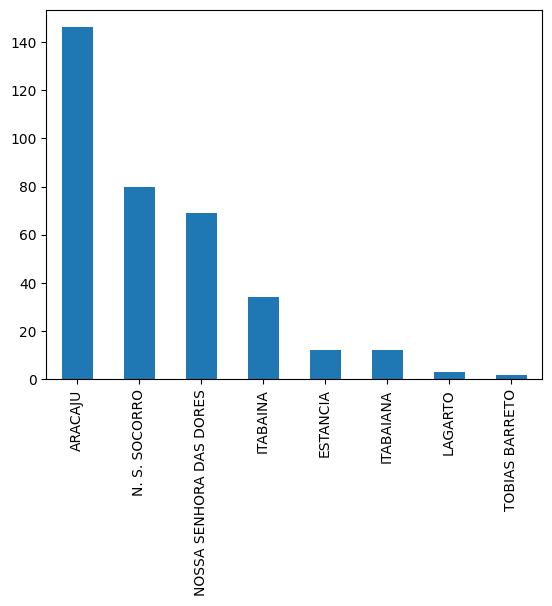

In [37]:
#Gráfico de barras vendas por cidade de Sergipe
df.loc[df["UF"] == "SE"]['Cidade'].value_counts(ascending=False).plot.bar();

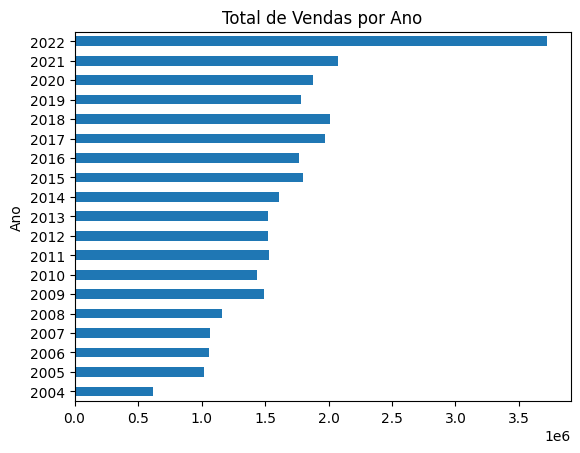

In [38]:
df.groupby(df["Ano"])["total"].sum().plot.barh(title='Total de Vendas por Ano');

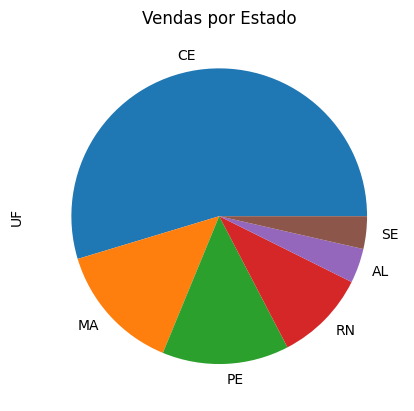

In [39]:
#Gráfico de Pizza
df["UF"].value_counts().plot.pie(title="Vendas por Estado");

In [40]:
#Total vendas por cidade
df["UF"].value_counts()

CE    5486
MA    1416
PE    1391
RN    1005
AL     379
SE     358
Name: UF, dtype: int64

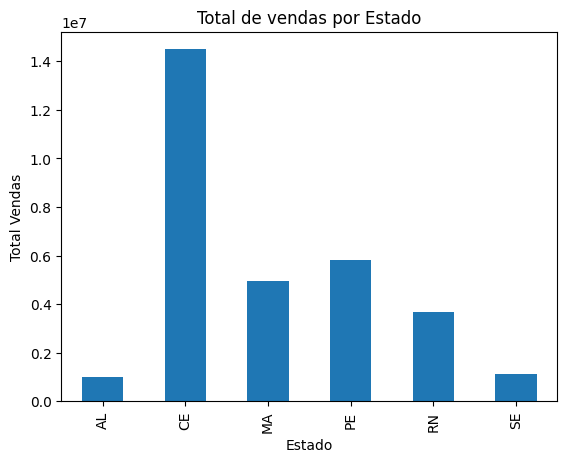

In [41]:
import matplotlib.pyplot as plt

df.groupby(df["UF"])["total"].sum().plot.bar(title="Total de vendas por Estado")
plt.xlabel("Estado")
plt.ylabel("Total Vendas");

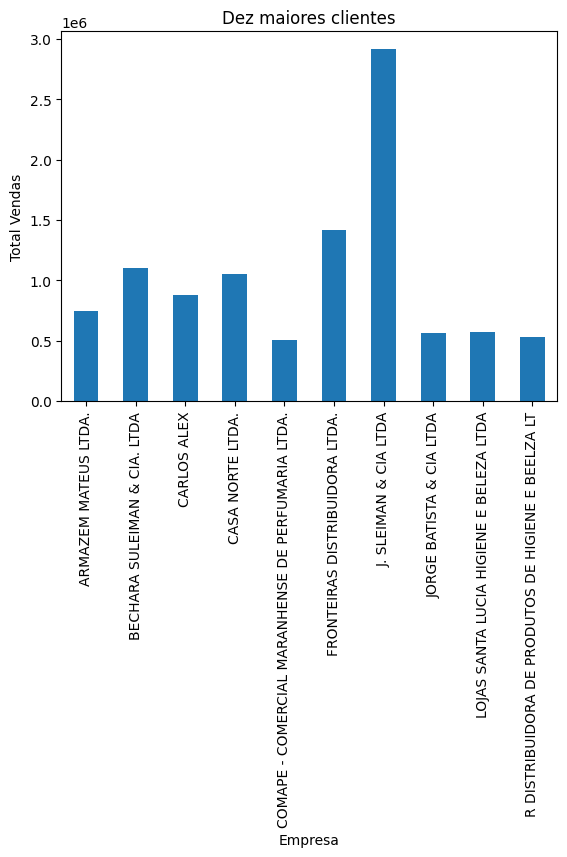

In [87]:
df_empresa.nlargest(10, 'total').groupby('EMPRESA')['total'].sum().plot.bar(title='Dez maiores clientes')
plt.xlabel("Empresa")
plt.ylabel("Total Vendas");